In [2]:
import torch.nn.functional as F
import copy
import os
import torch
from torchinfo import summary
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
import sklearn.preprocessing
#from directory_tree import display_tree
# Customed Library
import engine ,model_builder,utils
import numpy as np
#import torchinfo
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
import random
import torch.nn.functional as F
#display_tree('./')

In [3]:
#Plot the graph

def rawdataplot(Total_dataset):
    TEMP_Total_dataset=Total_dataset
    fig, axes = plt.subplots(nrows=4, ncols=1)
    TEMP_Total_dataset[Flag_col].replace({True: 1, False: 0}).plot(ax=axes[0],grid=True,title='Flag')

    TEMP_Total_dataset[For_col].plot(ax=axes[1],grid=True,title='F/T sensor(True value)')
    TEMP_Total_dataset[Input_P_col].plot(ax=axes[2],grid=True,title='Input pressure')
    TEMP_Total_dataset[TCP_col].plot(ax=axes[3],grid=True,title='TCP')
    plt.tight_layout()


    fig, axes = plt.subplots(nrows=3, ncols=1)
    TEMP_Total_dataset[right_finger_pressure1].plot(ax=axes[0],legend=None,grid=True,title='Pressure Half 1')
    TEMP_Total_dataset[right_finger_pressure2].plot(ax=axes[1],legend=None,grid=True,title='Pressure Half 2')
    TEMP_Total_dataset[right_finger_strain].plot(ax=axes[2],grid=True,legend=None,title='Strain sensor')
    plt.tight_layout()
    fig, axes = plt.subplots(nrows=3, ncols=1)
    TEMP_Total_dataset[left_finger_pressure1].plot(ax=axes[0],legend=None,grid=True,title='Pressure Half 1')
    TEMP_Total_dataset[left_finger_pressure2].plot(ax=axes[1],legend=None,grid=True,title='Pressure Half 2')
    TEMP_Total_dataset[left_finger_strain].plot(ax=axes[2],grid=True,legend=None,title='Strain sensor')
    plt.tight_layout()
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def plot_prediction(Pred_Values,True_Values,Lim_value, nbins=15,save_flag=False, save_name=None):
#def plot_loss_curves(results_bunch: dict[str, list[float]]):
    """Plots Results

    Args: True value, Prediction results ,nbins and save flag and save name
        
    """
    xlim =Lim_value
    ylim =Lim_value
    
    
    fig,host=plt.subplots(nrows=2, ncols=3,figsize=(15,8))
    ax0 = host[0][0].twinx()
    
    host[0][0].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][0].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][0].plot(utils.extraction(True_Values,0),label='True',color='black')
    host[0][0].plot(utils.extraction(Pred_Values,0),label='Predict',color='red',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,0))),len(np.array(utils.extraction(True_Values,0))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,0)) - np.array(utils.extraction(Pred_Values,0))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][0].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('X')
    
    
    ax0 = host[0][1].twinx()
    
    host[0][1].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][1].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][1].plot(utils.extraction(True_Values,1),label='True',color='black')
    host[0][1].plot(utils.extraction(Pred_Values,1),label='Predict',color='blue',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,0))),len(np.array(utils.extraction(True_Values,0))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,1)) - np.array(utils.extraction(Pred_Values,1))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][1].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('Y')
    
    ax0 = host[0][2].twinx()
    
    host[0][2].set_ylim(-7, 8)
    ax0.set_ylim(-0, 10)
    
    host[0][2].set_ylabel("Force[N]")
    ax0.set_ylabel("RMSE[N]")

    
    host[0][2].plot(utils.extraction(True_Values,2),label='True',color='black')
    host[0][2].plot(utils.extraction(Pred_Values,2),label='Predict',color='orange',linestyle ="--")
    
    A0=np.linspace(0,len(np.array(utils.extraction(True_Values,2))),len(np.array(utils.extraction(True_Values,2))))
    
    ax0.fill_between(A0,0, np.absolute(np.array(utils.extraction(True_Values,2)) - np.array(utils.extraction(Pred_Values,2))),  label='RMSE',alpha=.3)
    
    # ask matplotlib for the plotted objects and their labels
    lines, labels = host[0][2].get_legend_handles_labels()
    lines2, labels2 = ax0.get_legend_handles_labels()
    ax0.legend(lines + lines2, labels + labels2, loc=0)
    plt.title('Z')
   

    
    #plt.tight_layout(pad=3)
    

    
    #plt.show()
    # For 


    #plt.figure(figsize=(12,3))
    
    y = utils.extraction(Pred_Values,0)
    x = utils.extraction(True_Values,0)
    host[1][0].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet, range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][0].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][0].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('X')

    
    y = utils.extraction(Pred_Values,1)
    x = utils.extraction(True_Values,1)
    host[1][1].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet, range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][1].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][1].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('Y')


    
    y = utils.extraction(Pred_Values,2)
    x = utils.extraction(True_Values,2)
    host[1][2].hist2d(x, y, bins=(nbins, nbins), cmap=plt.cm.jet,range=[[-xlim, xlim], [-ylim, ylim]])
    host[1][2].set_xlabel('Ground Truth Force Magnitude (N)')
    host[1][2].set_ylabel('Predicted Force Magnitude (N)')
    plt.title('Z')

   
    fig.suptitle(save_name)
    plt.tight_layout(pad=1)
    plt.show()
    if save_flag==True:
        fig.savefig(save_name)
    
def plot_loss_curves(results_bunch,single_flag=None,save_flag=False, save_name=None):
#def plot_loss_curves(results_bunch: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
   # Setup a plot 
    plt.figure(figsize=(10, 5))
    if single_flag==None:
        for i in range(len(results_bunch)):
            results=results_bunch[i]

            # Get the loss values of the results dictionary (training and test)
            loss = results['train_loss']
            test_loss = results['test_loss']

            # Get the accuracy values of the results dictionary (training and test)


            # Figure out how many epochs there were
            epochs = range(len(results['train_loss']))



            # Plot loss
            plt.subplot(1, 2, 1)
            plt.plot(epochs, loss, label='con '+str(i))
            if i==len(results_bunch)-1:
                plt.title('Train_Loss')
                plt.xlabel('Epochs')
                plt.legend()


            plt.subplot(1, 2, 2)
            plt.plot(epochs, test_loss, label='con '+str(i))
            if i==len(results_bunch)-1:
                plt.title('Test_Loss')
                plt.xlabel('Epochs')
                plt.legend()
                
                
    else:
        results=results_bunch
         # Get the loss values of the results dictionary (training and test)
        loss = results['train_loss']
        test_loss = results['test_loss']

        # Get the accuracy values of the results dictionary (training and test)


        # Figure out how many epochs there were
        epochs = range(len(results['train_loss']))



        # Plot loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, loss, label='con ')

        plt.title('Train_Loss')
        plt.xlabel('Epochs')
        plt.legend()


        plt.subplot(1, 2, 2)
        plt.plot(epochs, test_loss, label='con ')
        
        plt.title('Test_Loss')
        plt.xlabel('Epochs')
        plt.legend()

    plt.suptitle(save_name)
    plt.tight_layout(pad=1)
    
    if save_flag==True:
        plt.savefig(save_name)
    plt.show()


In [4]:
from torch import nn 

class LSTMModel_V0(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V1, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.Relu=nn.leaky_relu()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.Relu(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out
class LSTMModel_V1(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V1, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.Relu=nn.ReLU()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.Relu(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


class LSTMModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float,device):
        super(LSTMModel_V2, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob,
        device=device)
        
        self.act_F=nn.Tanh()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.act_F(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out


class LSTMModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(LSTMModel_V3, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        
        self.act_F=nn.Sigmoid()

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()


        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        out = self.act_F(out)
        
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

class RNNModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(RNNModel_V3, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.RNN(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Sigmoid()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out    
    
    
    

class GRUModel_V3(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(GRUModel_V3, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Sigmoid()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out  
    
class GRUModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float,device):
        super(GRUModel_V2, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out
    
class GRUModel_V0(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(GRUModel_V0, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        #out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out  
'''
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.hidden_size = hidden_size
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Parameter(torch.rand(hidden_size))
        self.v.data.normal_(mean=0, std=1. / hidden_size**0.5)

    def forward(self, hidden, encoder_outputs):
        # hidden: (batch_size, hidden_size)
        # encoder_outputs: (batch_size, seq_len, hidden_size)

        seq_len = encoder_outputs.size(1)

        # Repeat the hidden state for each time step in the sequence
        hidden = hidden.unsqueeze(1).repeat(1, seq_len, 1)

        # Concatenate the hidden state and encoder outputs
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))

        # Compute attention scores
        energy = energy.permute(0, 2, 1)  # (batch_size, hidden_size, seq_len)
        v = self.v.unsqueeze(0).unsqueeze(0).repeat(hidden.size(0), 1, 1)  # (batch_size, 1, hidden_size)
        attention_scores = torch.bmm(v, energy).squeeze(1)  # (batch_size, seq_len)

        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=1).unsqueeze(2)

        # Calculate the weighted sum of encoder outputs
        context = torch.bmm(attention_weights.permute(0, 2, 1), encoder_outputs)

        return context, attention_weights

class LSTMWithAttention(nn.Module):
  # def __init__(self, input_size, hidden_size, output_size, num_layers=1):
    def __init__(self, input_size : int, hidden_size:int, num_layers:int, output_size:int, dropout_prob:float):
        super(LSTMWithAttention, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.attention = Attention(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # Attention mechanism
        context, attention_weights = self.attention(h_n[-1], lstm_out)

        # Concatenate the context vector with the hidden state
        lstm_out = torch.cat((context, h_n[-1]), dim=1)

        # Fully connected layer
        output = self.fc(lstm_out)

        return output ,attention_weights
'''
class AttentionLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(AttentionLSTM, self).__init__()
        self.hidden_size = hidden_size

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Attention mechanism
        self.attention = nn.Linear(hidden_size * 2, 1)

        # Fully connected layer for regression
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM layer
        lstm_out, (h_n, _) = self.lstm(x)

        # Attention mechanism
        attention_weights = F.softmax(self.attention(torch.cat([lstm_out, h_n.repeat(lstm_out.size(1), 1, 1)], dim=2)), dim=1)
        context = torch.bmm(attention_weights.permute(0, 2, 1), lstm_out).squeeze(1)

        # Fully connected layer
        output = self.fc(context)

        return output, attention_weights
    
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return torch.squeeze(x,1)

class Multi_2_nn(nn.Module):
    def __init__(self, input_dim1 : int,input_dim2 : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(Multi_2_nn, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.lstm1 = nn.LSTM(input_dim1, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm2 = nn.LSTM(input_dim1, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        
    def forward(self, x1,x2):
        # LSTM layer
        lstm_out1, (h_n1, _) = self.lstm1(x1)
        lstm_out2, (h_n2, _) = self.lstm2(x2)
        out = torch.cat((lstm_out1[:, -1, :], lstm_out2[:, -1, :]), dim=1) 

        # Fully connected layer
        output = self.fc(out)

        return output
class Multi_3_nn(nn.Module): # Pressure, stain, Given pressure
    def __init__(self, input_dim1 : int,input_dim2 : int,input_dim3 ,hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(Multi_3_nn, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.lstm1 = nn.LSTM(input_dim1, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm2 = nn.LSTM(input_dim2, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm3 = nn.LSTM(input_dim3, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim*3, output_dim)
        
    def forward(self, x1,x2,x3):
        # LSTM layer
        lstm_out1, (h_n1, _) = self.lstm1(x1)
        lstm_out2, (h_n2, _) = self.lstm2(x2)
        lstm_out3, (h_n3, _) = self.lstm3(x3)
        out = torch.cat((lstm_out1[:, -1, :], lstm_out2[:, -1, :]), dim=1) 
        out = torch.cat((out, lstm_out3[:, -1, :]), dim=1) 
        # Fully connected layer
        output = self.fc(out)

        return output
    
class Multi_5_nn(nn.Module): # Pressure, stain, Given pressure
    def __init__(self, input_dim1 : int,input_dim2 : int,input_dim3 :int ,input_dim4 :int,input_dim5 :int,hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float):
        super(Multi_5_nn, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.lstm1 = nn.LSTM(input_dim1, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm2 = nn.LSTM(input_dim2, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm3 = nn.LSTM(input_dim3, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm4 = nn.LSTM(input_dim4, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        self.lstm5 = nn.LSTM(input_dim5, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim*5, output_dim)
        
    def forward(self, x1,x2,x3,x4,x5):
        # LSTM layer
        lstm_out1, (h_n1, _) = self.lstm1(x1)
        lstm_out2, (h_n2, _) = self.lstm2(x2)
        lstm_out3, (h_n3, _) = self.lstm3(x3)
        lstm_out4, (h_n4, _) = self.lstm4(x4)
        lstm_out5, (h_n5, _) = self.lstm5(x5)
        out = torch.cat((lstm_out1[:, -1, :], lstm_out2[:, -1, :]), dim=1) 
        out = torch.cat((out, lstm_out3[:, -1, :]), dim=1) 
        out = torch.cat((out, lstm_out4[:, -1, :]), dim=1) 
        out = torch.cat((out, lstm_out5[:, -1, :]), dim=1) 
        # Fully connected layer
        output = self.fc(out)

        return output

In [5]:
Columns=['Flag',
         'Force_X','Force_Y','Force_Z','Torque_X','Torque_Y','Torque_Z',
         'Input_P_1','Input_P_2',
         'TCP_X','TCP_Y','TCP_Z',
         'Sensor_P_1_1','Sensor_P_1_2','Sensor_P_1_3','Sensor_P_1_4',
         'Sensor_P_1_5','Sensor_P_1_6','Sensor_P_1_7','Sensor_P_1_8',
         'Sensor_P_1_9','Sensor_P_1_10','Sensor_P_1_11','Sensor_P_1_12',
         'Sensor_S_1',
         'Sensor_P_2_1','Sensor_P_2_2','Sensor_P_2_3','Sensor_P_2_4',
         'Sensor_P_2_5','Sensor_P_2_6','Sensor_P_2_7','Sensor_P_2_8',
         'Sensor_P_2_9','Sensor_P_2_10','Sensor_P_2_11','Sensor_P_2_12',
         'Sensor_S_2',
         'num_finger','properties','trial'
        ]
temp = pd.read_pickle("./pickle/diff_object.pkl") 
temp1 = pd.DataFrame(temp[:].values,columns=Columns)
Total_dataset=temp1

Flag_col = pd.Index(['Flag'])
For_col = pd.Index(['Force_X','Force_Y','Force_Z'])
Input_P_col = pd.Index(['Input_P_1','Input_P_2'])
TCP_col= pd.Index(['TCP_X','TCP_Y','TCP_Z'])

right_finger_pressure1 = pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                  'Sensor_P_1_3','Sensor_P_1_4',
                                  'Sensor_P_1_5','Sensor_P_1_6'])

right_finger_pressure2 = pd.Index([ 'Sensor_P_1_7','Sensor_P_1_8',
                           'Sensor_P_1_9','Sensor_P_1_10',
                           'Sensor_P_1_11','Sensor_P_1_12'])
right_finger_pressure=right_finger_pressure1.append(right_finger_pressure2)
right_finger_strain = pd.Index([ 'Sensor_S_1' ])

right_finger_sensor=right_finger_pressure.append(right_finger_strain)

left_finger_pressure1 = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                         'Sensor_P_2_3','Sensor_P_2_4',
                         'Sensor_P_2_5','Sensor_P_2_6'])

left_finger_pressure2 = pd.Index([ 'Sensor_P_2_7','Sensor_P_2_8',
                           'Sensor_P_2_9','Sensor_P_2_10',
                           'Sensor_P_2_11','Sensor_P_2_12'])
left_finger_pressure=left_finger_pressure1.append(left_finger_pressure2)

left_finger_strain = pd.Index([ 'Sensor_S_2' ])

left_finger_sensor=left_finger_pressure.append(left_finger_strain)


# Robot signal Calibration
Cal_list_col=[For_col,TCP_col]
'''
for i in range(len(Cal_list_col)):
    for j in range(len(Cal_list_col[i])):
        
        col_name=Cal_list_col[i][j]
        
        Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0]
        
# Sensor signal
Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]

for i in range(len(Sensor_Cal_list_col)):
    for j in range(len(Sensor_Cal_list_col[i])):
        
        col_name=Sensor_Cal_list_col[i][j]
        
        Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0] +500*j
'''

# Feature
right_finger_condition = right_finger_sensor.append(Input_P_col)
#right_finger_condition =right_finger_condition.append(TCP_col)
left_finger_condition = left_finger_sensor.append(Input_P_col)
#left_finger_condition =left_finger_condition.append(TCP_col)
One_entire_condition=right_finger_sensor.append(left_finger_sensor)
#One_entire_condition=One_entire_condition.append(TCP_col)
One_entire_condition=One_entire_condition.append(Input_P_col)
TCP_condition=One_entire_condition.append(Input_P_col)





Pressure_condition = right_finger_pressure.append(left_finger_pressure)#All pressure
Strain_condition = right_finger_strain.append(left_finger_strain)# All strain
Input_P_col

right_finger_pressure
right_finger_strain
left_finger_pressure
left_finger_strain


Index(['Sensor_S_2'], dtype='object')

In [6]:
obj_SQR=pd.read_pickle("./pickle/Final_data/obj_SQR.pkl")
obj_CCV=pd.read_pickle("./pickle/Final_data/obj_CCV.pkl")
obj_BIG=pd.read_pickle("./pickle/Final_data/obj_BIG.pkl")
obj_untrain=pd.read_pickle("./pickle/Final_data/obj_untrain.pkl")
total_learning_dataset=pd.read_pickle("./pickle/Final_data/total_learning_dataset.pkl")

In [7]:
Columns.append('Net_force')

In [8]:

Low_f= pd.DataFrame(total_learning_dataset.query('Net_force<0.6 ').values,columns=Columns)
med_f= pd.DataFrame(total_learning_dataset.query('Net_force>0.6 and Net_force<1.2').values,columns=Columns)
high_f= pd.DataFrame(total_learning_dataset.query('Net_force>1.2 ').values,columns=Columns)


In [9]:
high_f

Index(['Sensor_P_1_1', 'Sensor_P_1_2', 'Sensor_P_1_3', 'Sensor_P_1_4',
       'Sensor_P_1_5', 'Sensor_P_1_6', 'Sensor_P_1_7', 'Sensor_P_1_8',
       'Sensor_P_1_9', 'Sensor_P_1_10', 'Sensor_P_1_11', 'Sensor_P_1_12',
       'Sensor_S_1', 'Sensor_P_2_1', 'Sensor_P_2_2', 'Sensor_P_2_3',
       'Sensor_P_2_4', 'Sensor_P_2_5', 'Sensor_P_2_6', 'Sensor_P_2_7',
       'Sensor_P_2_8', 'Sensor_P_2_9', 'Sensor_P_2_10', 'Sensor_P_2_11',
       'Sensor_P_2_12', 'Sensor_S_2', 'Input_P_1', 'Input_P_2'],
      dtype='object')

In [10]:
class GRUModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float,device):
        super(GRUModel_V2, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out

In [12]:
Input_dim

28

In [18]:
Sequential_L=2
BATCH_SIZE = 32
LEARNING_RATE = 0.001
Dropout_prob=0
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
Combi_df=total_learning_dataset
Y=np.array(Combi_df.filter(items=For_col))
X=np.array(Combi_df.filter(items=One_entire_condition)) ## important part


X_scaler = sklearn.preprocessing.MinMaxScaler()
Y_scaler = sklearn.preprocessing.MinMaxScaler()

X_train=torch.FloatTensor(X_scaler.fit_transform(X))
Y_train=torch.FloatTensor(Y_scaler.fit_transform(Y))

Input_dim=len(X_train[0])
Output_dim=len(Y_train[0])



model=GRUModel_V2(
    input_dim = Input_dim,
    hidden_dim=5,
    layer_dim=2,
    output_dim=Output_dim,
    dropout_prob=0,
    device=device
)

model.load_state_dict(torch.load("models/GRU/model_GRULD_2SQ_2HU_5.pth",map_location=torch.device('cpu')))
summary(model)




Layer (type:depth-idx)                   Param #
GRUModel_V2                              --
├─GRU: 1-1                               705
├─Tanh: 1-2                              --
├─Linear: 1-3                            18
Total params: 723
Trainable params: 723
Non-trainable params: 0

In [20]:
model

GRUModel_V2(
  (rnn): GRU(28, 5, num_layers=2, batch_first=True)
  (act_F): Tanh()
  (fc): Linear(in_features=5, out_features=3, bias=True)
)

In [70]:
model.eval()
with torch.no_grad():
    A=model(X.to(device))
    print(f'predicted value {A}')
    print(f'Input {X.to(device)}')
    

predicted value tensor([[0.7306, 0.4207, 0.6821]])
Input tensor([[[0.5570, 0.7260, 0.5460, 0.3094, 0.3325, 0.4730, 0.4433, 0.4037,
          0.3016, 0.5180, 0.7230, 0.5085, 0.3619, 0.3722, 0.6539, 0.5583,
          0.3656, 0.3002, 0.7989, 0.6718, 0.4070, 0.3884, 0.5116, 0.1118,
          0.0852, 0.3780, 0.6000, 0.4000],
         [0.5570, 0.7260, 0.5460, 0.3094, 0.3325, 0.4730, 0.4433, 0.4037,
          0.3016, 0.5180, 0.7230, 0.5085, 0.3619, 0.3722, 0.6539, 0.5583,
          0.3656, 0.3016, 0.7989, 0.6513, 0.4070, 0.3884, 0.5116, 0.1118,
          0.0852, 0.3780, 0.6000, 0.4000]]])


In [64]:
torch.unsqueeze(next(iter(DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)))[0][0],0)

tensor([[[0.5100, 0.5051, 0.6009, 0.6300, 0.3890, 0.5242, 0.4747, 0.3437,
          0.5719, 0.3864, 0.4517, 0.4422, 0.0261, 0.5778, 0.6886, 0.5411,
          0.6391, 0.3262, 0.6261, 0.5696, 0.6524, 0.7941, 0.5359, 0.1395,
          0.1186, 0.0448, 0.0000, 0.0000],
         [0.5100, 0.5051, 0.6009, 0.6300, 0.3890, 0.5242, 0.4747, 0.3437,
          0.5719, 0.3864, 0.4517, 0.4422, 0.0261, 0.5778, 0.6886, 0.5411,
          0.6391, 0.3262, 0.6261, 0.5696, 0.6524, 0.7941, 0.5359, 0.1395,
          0.1186, 0.0448, 0.0000, 0.0000]]])

In [72]:
next(iter(DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)))[0][0].size()

torch.Size([2, 28])

In [51]:
model(next(iter(DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)))[0][0])

IndexError: too many indices for tensor of dimension 2

In [43]:
Val_dataset=DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=1,shuffle=False)

In [44]:
output=[]
model.eval()
with torch.no_grad():
    for X, _ in Val_dataset:
        y_star = model(X.to(device))
        

KeyboardInterrupt: 

In [47]:
X.to(device).size()

torch.Size([1, 2, 28])

tensor([[[0.9807, 0.9161, 0.7887,  ..., 0.0364, 1.0000, 0.0000],
         [0.9807, 0.9161, 0.7887,  ..., 0.0364, 1.0000, 0.0000]],

        [[0.9807, 0.9161, 0.7887,  ..., 0.0364, 1.0000, 0.0000],
         [0.9807, 0.9161, 0.7887,  ..., 0.0364, 1.0000, 0.0000]],

        [[0.9807, 0.9161, 0.7887,  ..., 0.0364, 1.0000, 0.0000],
         [0.9807, 0.9161, 0.7887,  ..., 0.0364, 1.0000, 0.0000]],

        ...,

        [[0.9811, 0.9173, 0.7839,  ..., 0.0360, 1.0000, 0.0000],
         [0.9811, 0.9173, 0.7839,  ..., 0.0360, 1.0000, 0.0000]],

        [[0.9811, 0.9173, 0.7839,  ..., 0.0360, 1.0000, 0.0000],
         [0.9811, 0.9173, 0.7839,  ..., 0.0360, 0.0000, 0.0000]],

        [[0.9811, 0.9173, 0.7839,  ..., 0.0360, 0.0000, 0.0000],
         [0.9811, 0.9173, 0.7839,  ..., 0.0360, 0.0000, 0.0000]]])

In [ ]:
def predict(model: torch.nn.Module, 
            predict_data_loader: torch.utils.data.DataLoader,
            device):
    output = torch.tensor([]).to(device)
    model.to(device)
    model.eval()
    with torch.no_grad():
        for X, _ in predict_data_loader:
            y_star = model(X.to(device))
            output = torch.cat((output, y_star), 0)
    return output

model()

In [74]:
X_scaler

MinMaxScaler()

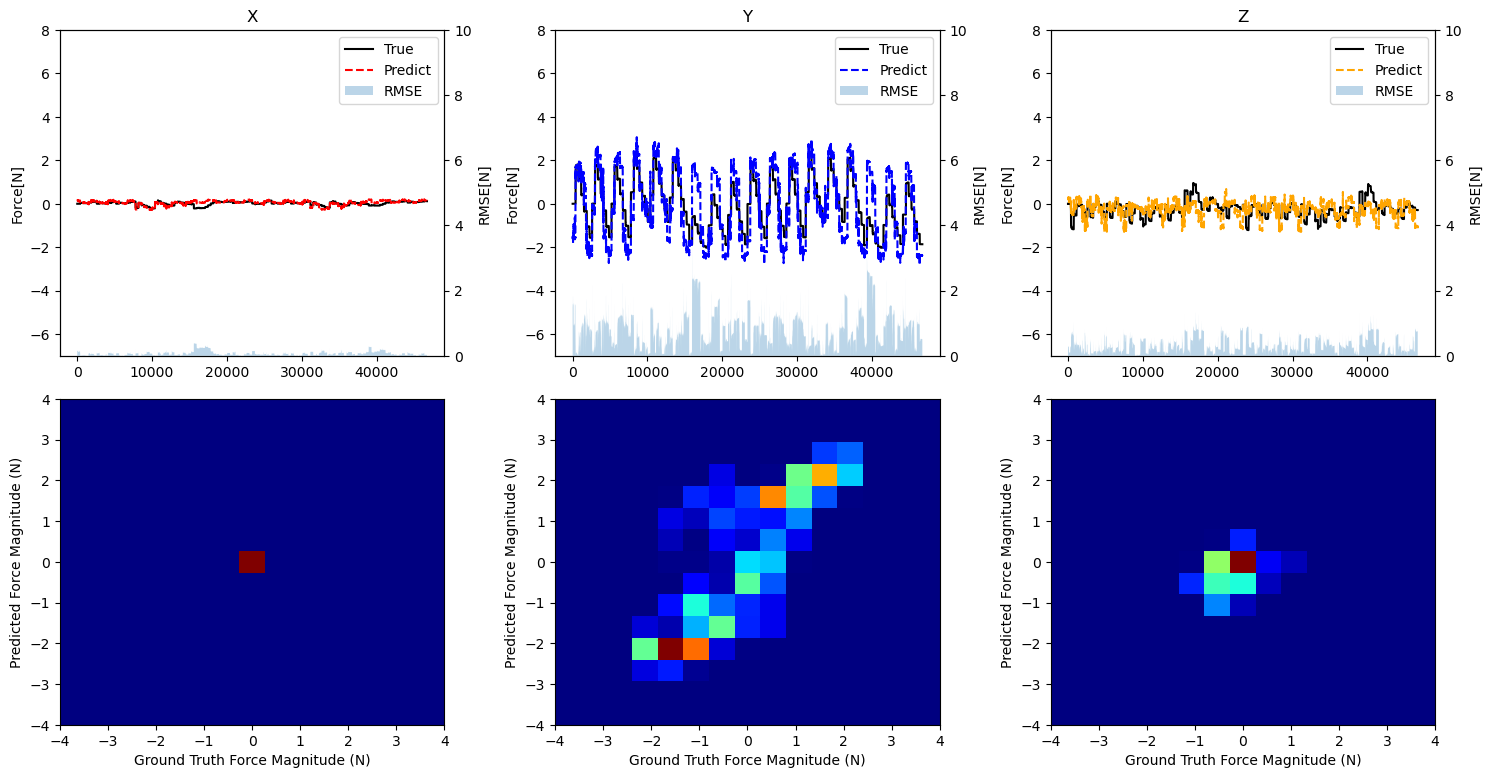

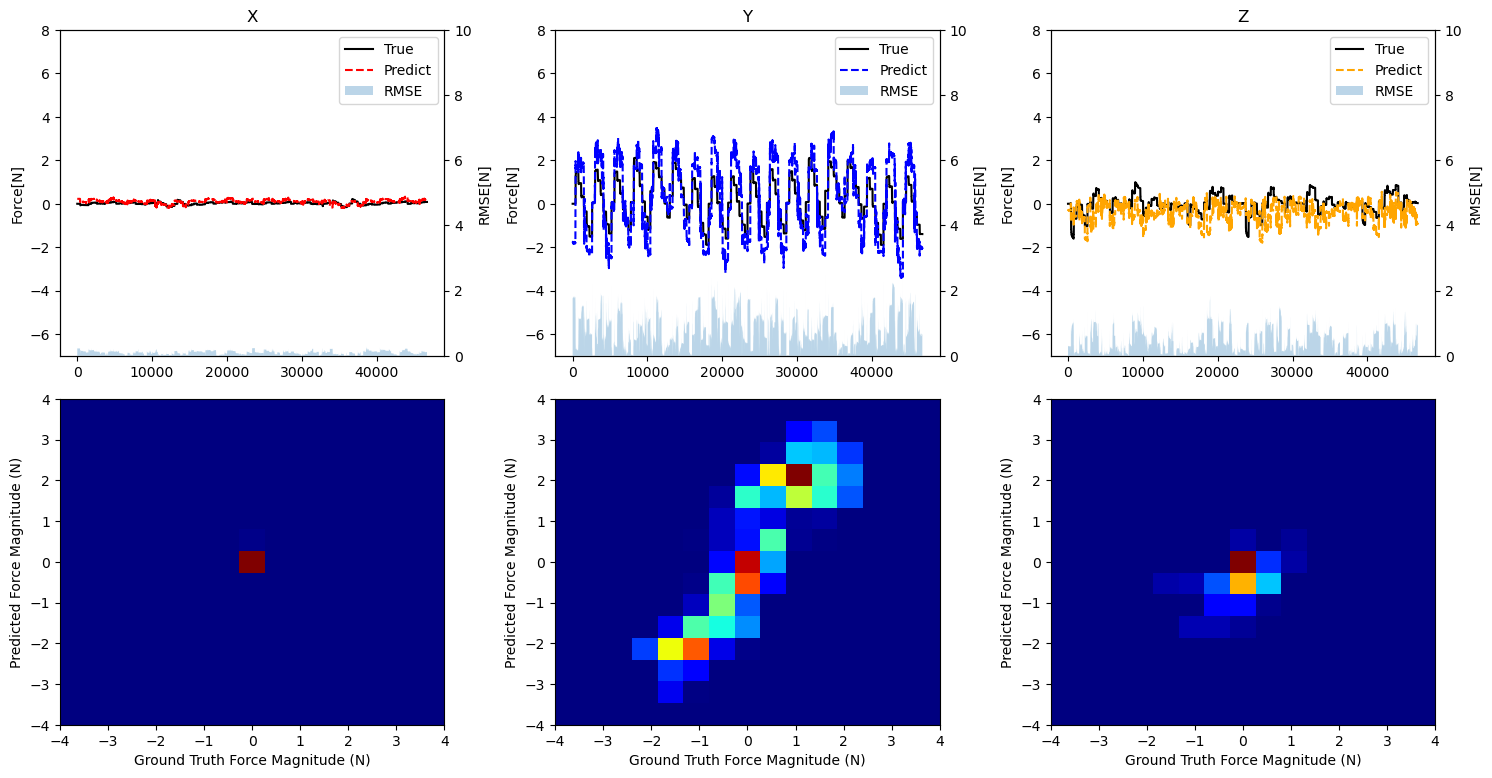

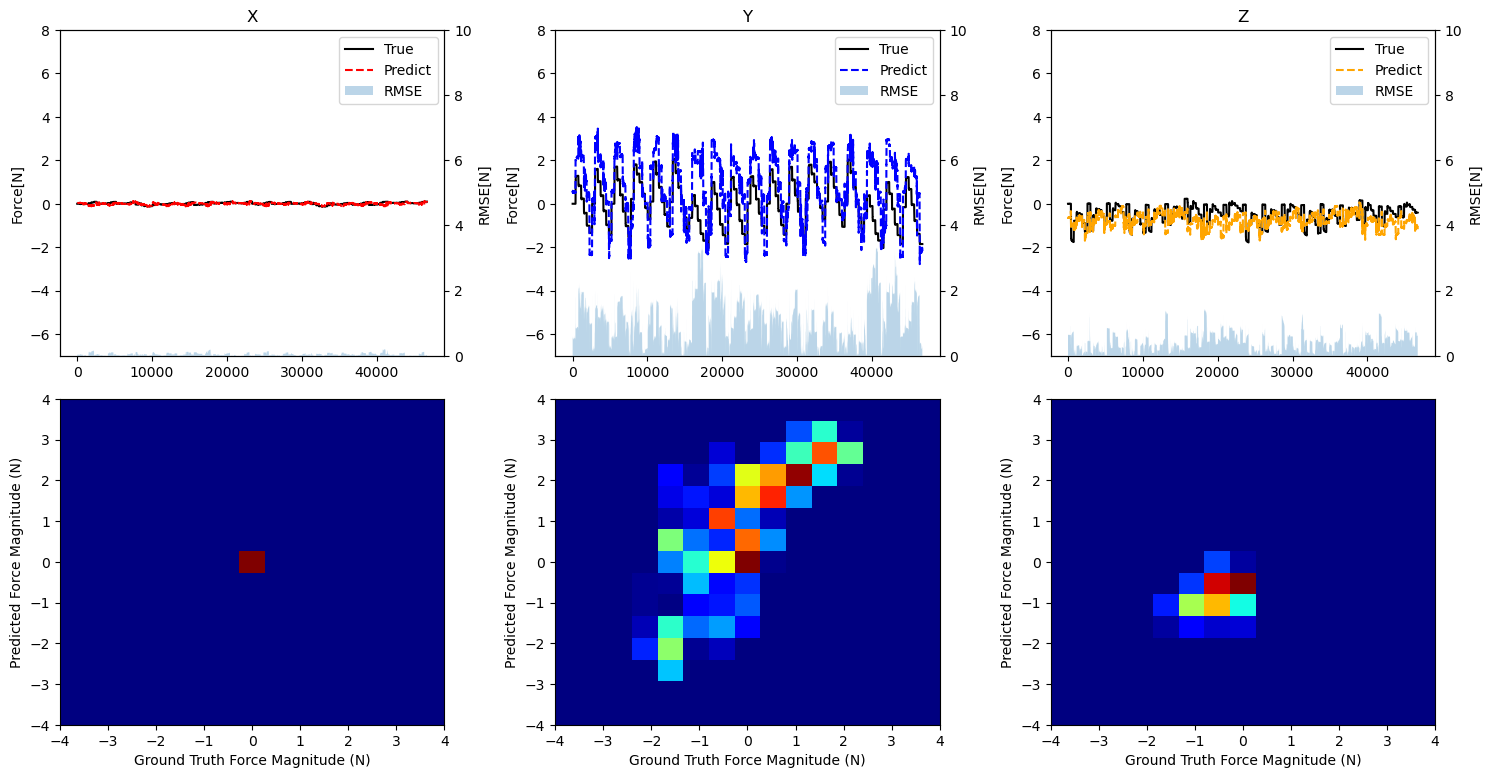

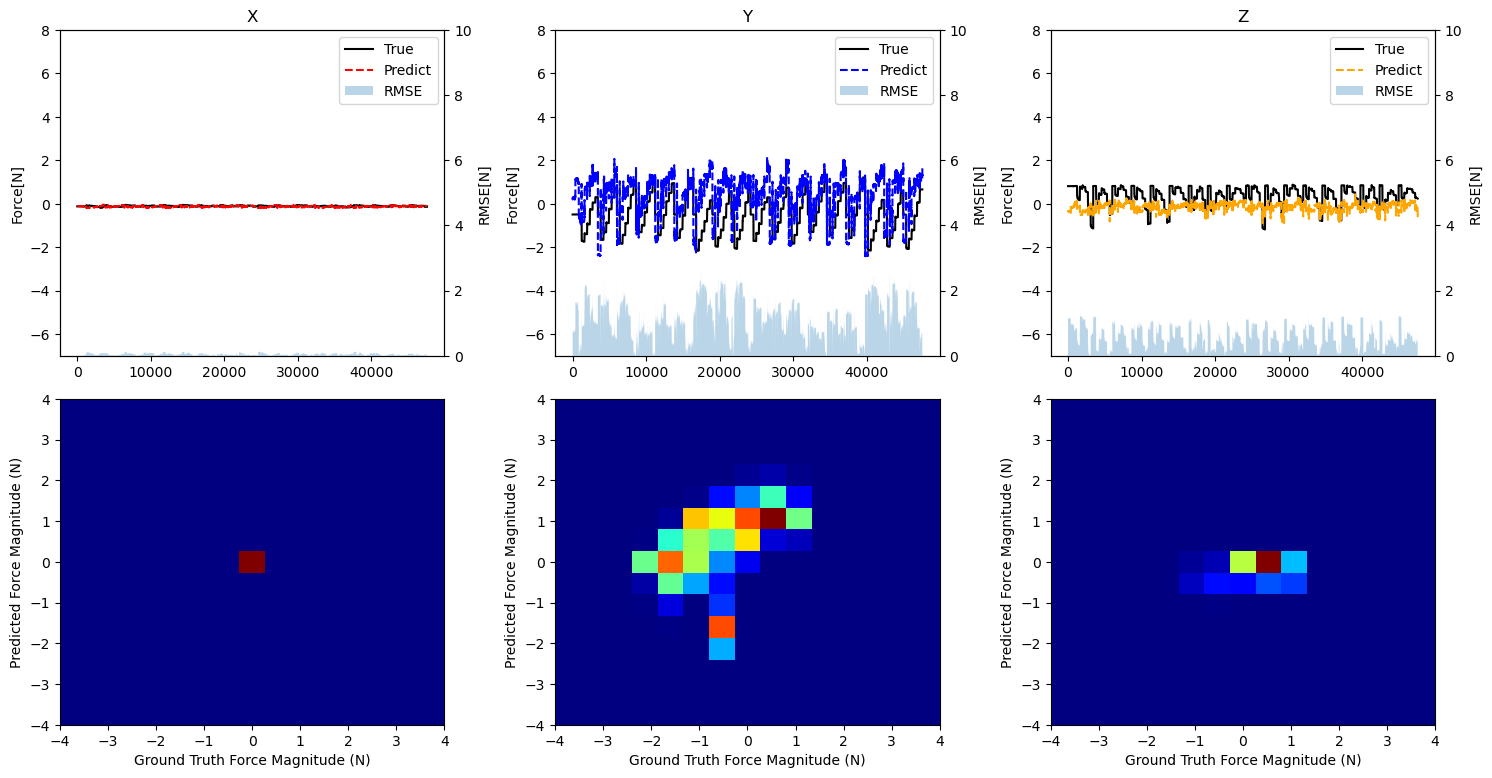

In [71]:
rmse_results=[]
datasetlist=[obj_SQR,obj_CCV,obj_BIG,obj_untrain]
for i in range(len(datasetlist)):
    Combi_df=datasetlist[i]
    Y=np.array(Combi_df.filter(items=For_col))
    X=np.array(Combi_df.filter(items=One_entire_condition)) ## important part

    X_scaler = sklearn.preprocessing.MinMaxScaler()
    Y_scaler = sklearn.preprocessing.MinMaxScaler()

    X_train=torch.FloatTensor(X_scaler.fit_transform(X))
    Y_train=torch.FloatTensor(Y_scaler.fit_transform(Y))


    Val_dataset=DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)

    Pred_Values=Y_scaler.inverse_transform(utils.predict(model,Val_dataset,device))
    True_Values=Y
    plot_prediction(Pred_Values,True_Values,4,save_flag=False,save_name=None )
    rmse_results.append( rmse(Pred_Values,True_Values))

In [91]:
rmse_results.append(sum(rmse_results)/len(rmse_results))

(0.0, 1.0)

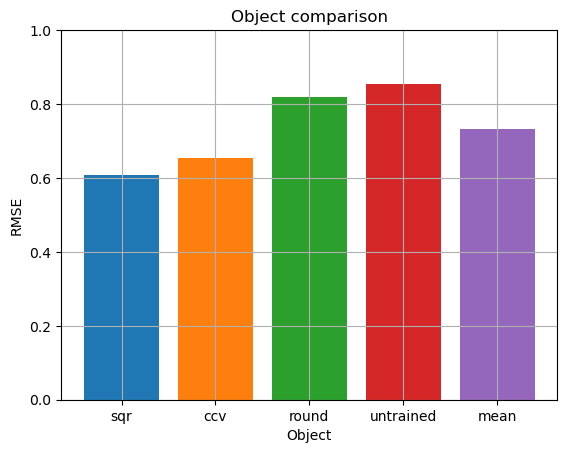

In [100]:

xx=['sqr','ccv','round','untrained','mean']
#color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive']
#color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']
color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
plt.bar(xx,rmse_results,color=color)
plt.title('Object comparison')
plt.ylabel('RMSE')
plt.xlabel('Object')
plt.grid()
plt.ylim([0,1])


#df_res['mean'] = df_res.apply(lambda row : (row.SQR + row.CCV + row.Round + row.Untrained)/4, axis =1  )

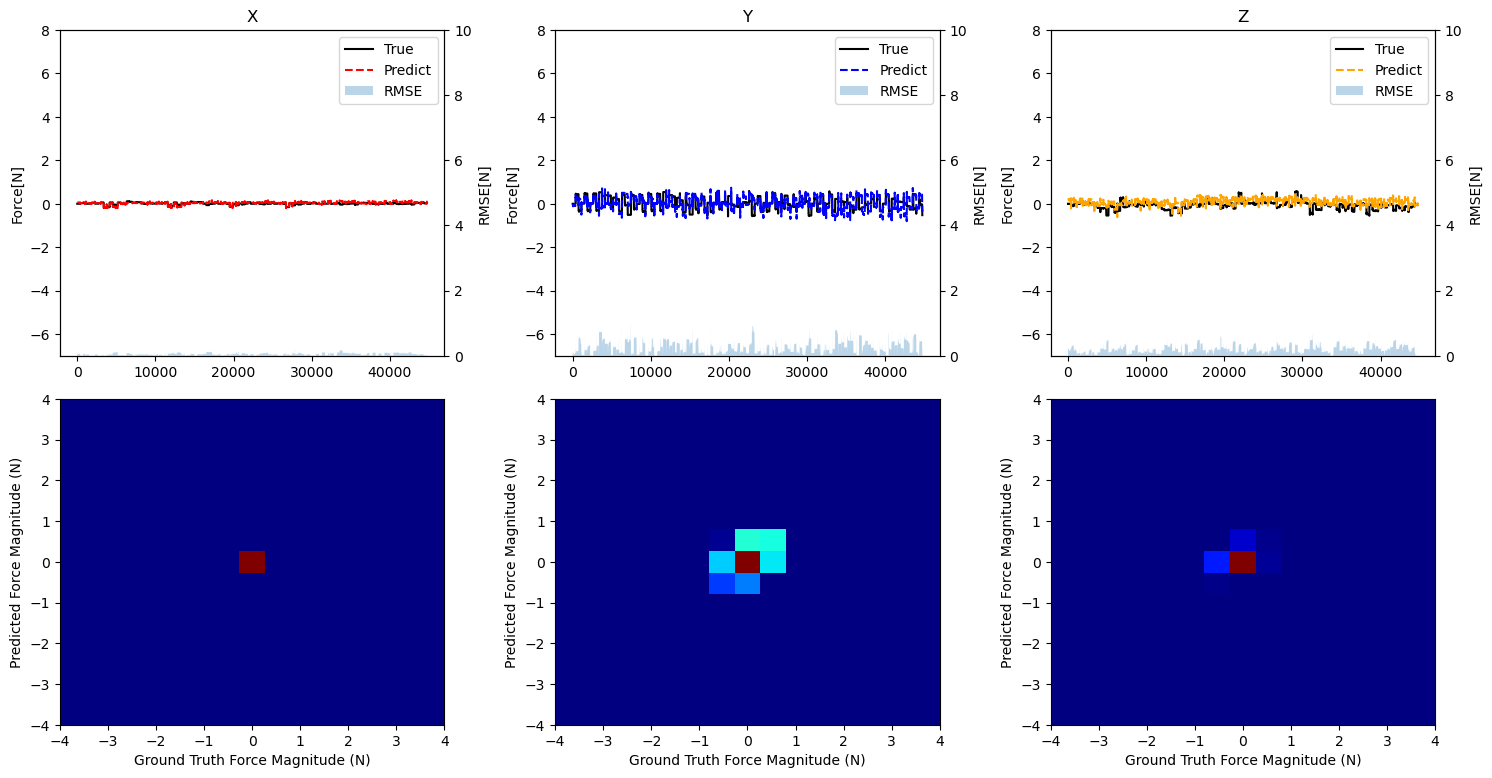

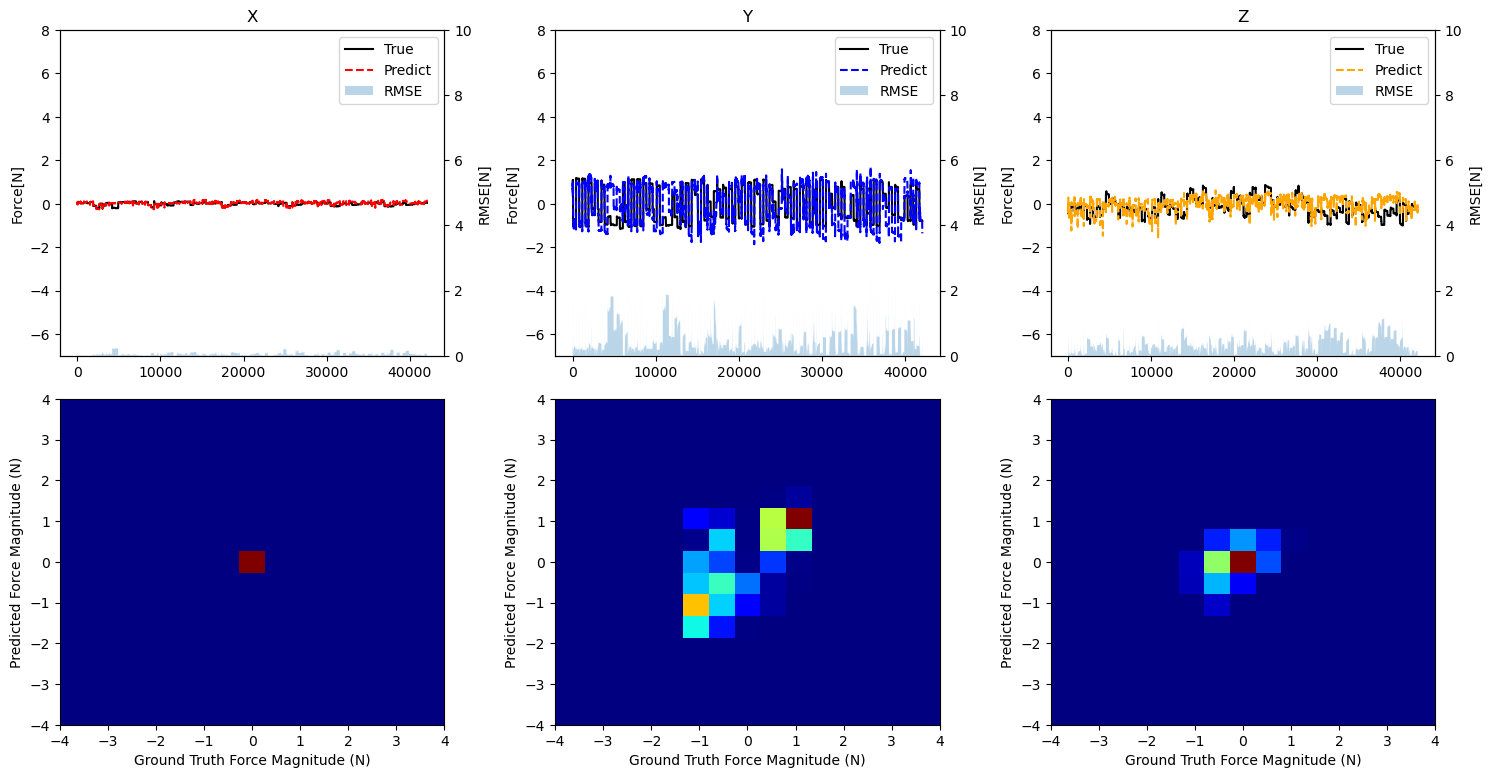

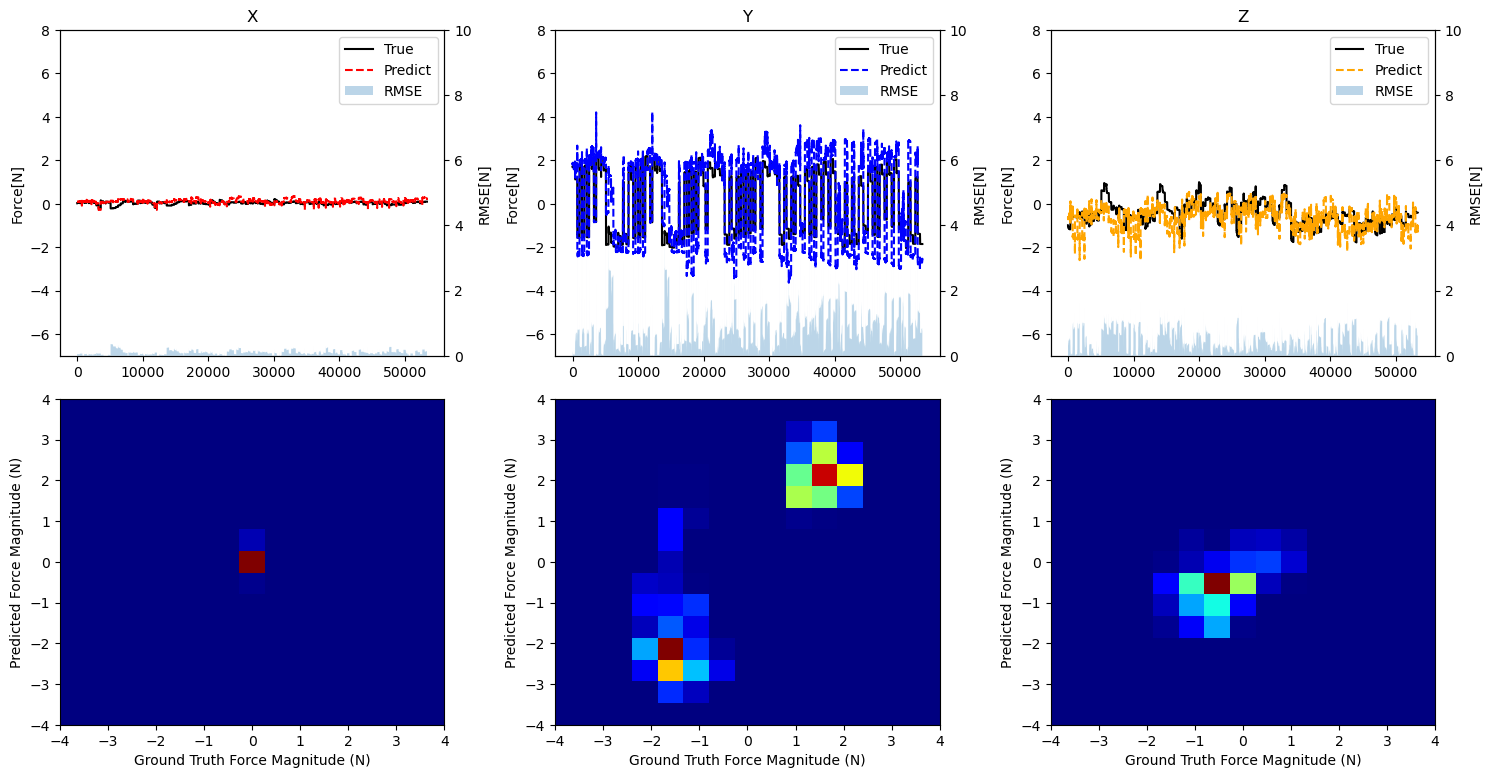

(0.0, 1.0)

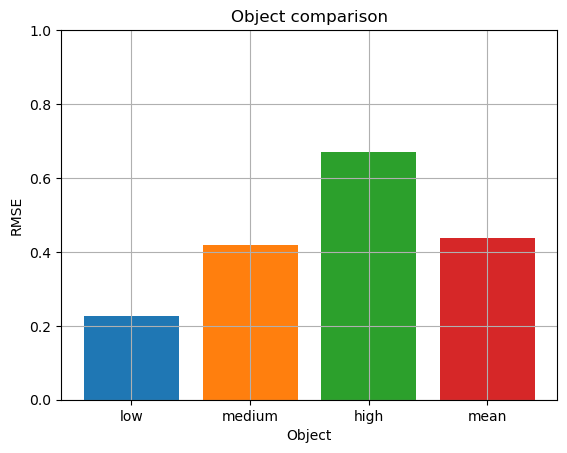

In [111]:
rmse_results=[]
datasetlist=[Low_f,med_f,high_f]
for i in range(len(datasetlist)):
    Combi_df=datasetlist[i]
    Y=np.array(Combi_df.filter(items=For_col))
    X=np.array(Combi_df.filter(items=One_entire_condition)) ## important part

    X_scaler = sklearn.preprocessing.MinMaxScaler()
    Y_scaler = sklearn.preprocessing.MinMaxScaler()

    X_train=torch.FloatTensor(X_scaler.fit_transform(X))
    Y_train=torch.FloatTensor(Y_scaler.fit_transform(Y))


    Val_dataset=DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)

    Pred_Values=Y_scaler.inverse_transform(utils.predict(model,Val_dataset,device))
    True_Values=Y
    plot_prediction(Pred_Values,True_Values,4,save_flag=False,save_name=None )
    rmse_results.append( rmse(Pred_Values,True_Values))
rmse_results.append(sum(rmse_results)/len(rmse_results))
xx=['low','medium','high','mean']
#color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive']
#color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink']
color=['tab:blue','tab:orange','tab:green','tab:red']
plt.bar(xx,rmse_results,color=color)
plt.title('Object comparison')
plt.ylabel('RMSE')
plt.xlabel('Object')
plt.grid()
plt.ylim([0,1])